In [53]:
import uproot
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import hist

# Define a list of ROOT files to open
root_file_list = glob.glob('/home/bernhard/hephy/mpw3/data/testbeam/desy_jul23/corry_desy/e_scans/*1311*.root')

# Define a list of keys (TKeys) to extract data from
#efficiency not working properly, TEfficiency sucks
keys_to_extract = ["EventLoaderEUDAQ2/RD50_MPW3_base_0/hPixelRawValues",
        "ClusteringSpatial/RD50_MPW3_base_0/clusterSize",
        "AnalysisDUT/RD50_MPW3_base_0/local_residuals/residualsX"]

root_file_list




['/home/bernhard/hephy/mpw3/data/testbeam/desy_jul23/corry_desy/e_scans/ana_e_1311_4.2GeV.root']

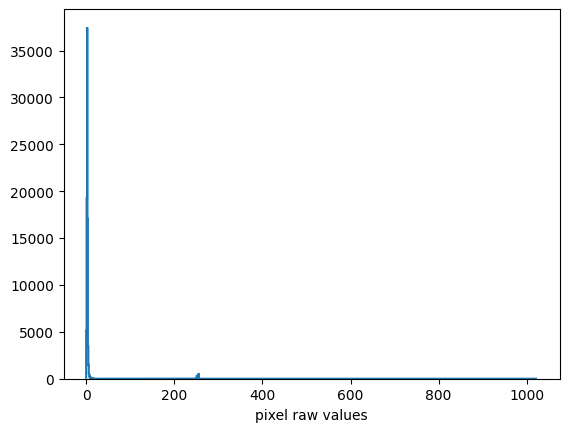

mean =  6.982257394674911
std 34.737248626744424


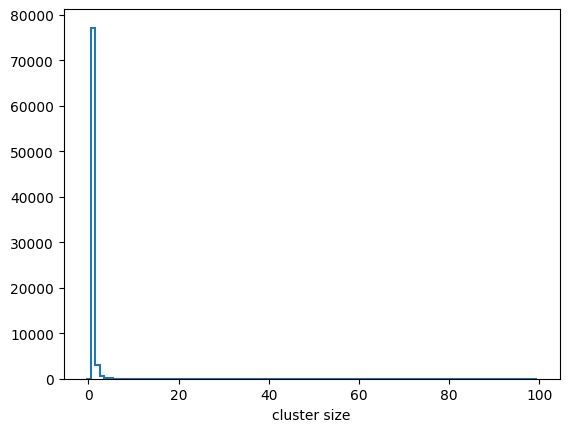

mean =  1.0678920330651818
std 0.3361601868791533


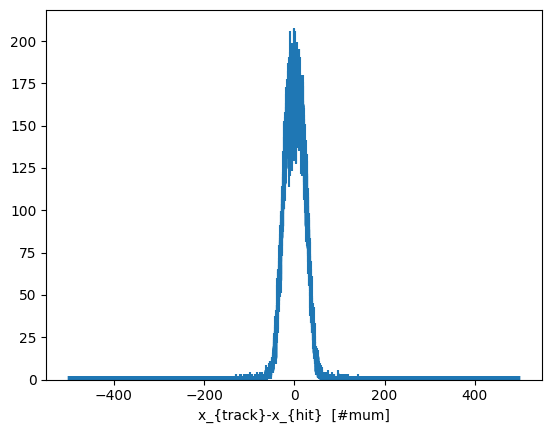

mean =  0.7812836910712535
std 21.490887160332434


,File,Key,Mean,StdDev,StdErr,N
0,/home/bernhard/hephy/mpw3/data/testbeam/desy_j...,EventLoaderEUDAQ2/RD50_MPW3_base_0/hPixelRawVa...,6.982257,34.737249,0.117985,86684.0
1,/home/bernhard/hephy/mpw3/data/testbeam/desy_j...,ClusteringSpatial/RD50_MPW3_base_0/clusterSize,1.067892,0.336160,0.001180,81173.0
2,/home/bernhard/hephy/mpw3/data/testbeam/desy_j...,AnalysisDUT/RD50_MPW3_base_0/local_residuals/r...,0.781284,21.490887,0.106380,40812.0


In [56]:
# Create an empty DataFrame to store the results
# results_df = pd.DataFrame(columns=["File", "Key", "Mean", "StdDev"])
results = {"File" : [], "Key" : [], "Mean" : [], "StdDev": [], "StdErr" : [], "N" :[] }

# Loop over each ROOT file
for root_file in root_file_list:
    # Open the ROOT file using uproot
    with uproot.open(root_file) as file:
        # Loop over each key to extract data
        for key_name in keys_to_extract:
            try:
                # Access the TKey using the key name
                tkey = file[key_name]
                mean_val = 0
                std_dev_val = 0
                N = 0
                # Check if the TKey points to a TH1F histogram
                if isinstance(tkey, uproot.uproot.behaviors.TH1.TH1):
                    hist_data = tkey.to_hist()
                    hist_np = tkey.to_numpy() # [0] ... bins, [1] ... weights
                    hist_data.plot()
                    plt.show()
                    unjagged_bins = (hist_np[1][:-1] + hist_np[1][1:]) / 2
                    N = np.sum(hist_np[0])
                    mean_val = np.sum(hist_np[0] * unjagged_bins) / N
                    print('mean = ', mean_val)                    
                    std_dev_val = np.sqrt(np.sum((hist_np[0] * (unjagged_bins - mean_val)**2)) / N)
                    print('std', std_dev_val)
                else:
                    continue

            

                results["Mean"].append(mean_val)
                results['StdDev'].append(std_dev_val)
                results['File'].append(root_file)
                results['Key'].append(key_name)
                results["N"].append(N)
                results["StdErr"].append(std_dev_val / np.sqrt(N))

            except KeyError:
                print(f"Key '{key_name}' not found in file '{root_file}'")

df = pd.DataFrame(results)
df